In [35]:

!pip install sqlalchemy


In [43]:
import pymysql
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt


host = '127.0.0.1'
user = 'root'
password = '1999'
database = 'mydb_reduc'

# Create an SQLAlchemy engine
connection = create_engine(f"mysql+pymysql://{user}:{password}@{host}/{database}")



query = "SELECT * FROM patient_details"


results_df = pd.read_sql(query, connection)
results_df.head()





,Patient_id,name,age,phone_number,gender
0,201,John Doe,25,123-456-7890,Male
1,202,Jane Smith,30,987-654-3210,Female
2,203,Michael Johnson,45,555-123-4567,Male
3,204,Emily Davis,28,777-888-9999,Female
4,205,Christopher Brown,32,333-222-1111,Male


In [44]:
#Query1

query = "SELECT * FROM appointments where date<'2023-04-01'"

results_df = pd.read_sql(query, connection)
results_df.head()


,Appointment_id,date,timings,issue_of_symptoms,doctorID,patientID
0,1,2023-03-01,0 days 10:00:00,Fever and headache,101,201
1,2,2023-03-05,0 days 11:30:00,Cough and cold symptoms,102,202
2,3,2023-03-10,0 days 13:15:00,Back pain and muscle soreness,103,203
3,4,2023-03-15,0 days 14:45:00,Annual checkup,104,204
4,5,2023-03-20,0 days 15:30:00,Follow-up on medication,105,205


           name  NumberOfAppointments
0     Dr. Smith                     2
1   Dr. Johnson                     2
2  Dr. Williams                     4
3     Dr. Brown                     4
4     Dr. Jones                     2


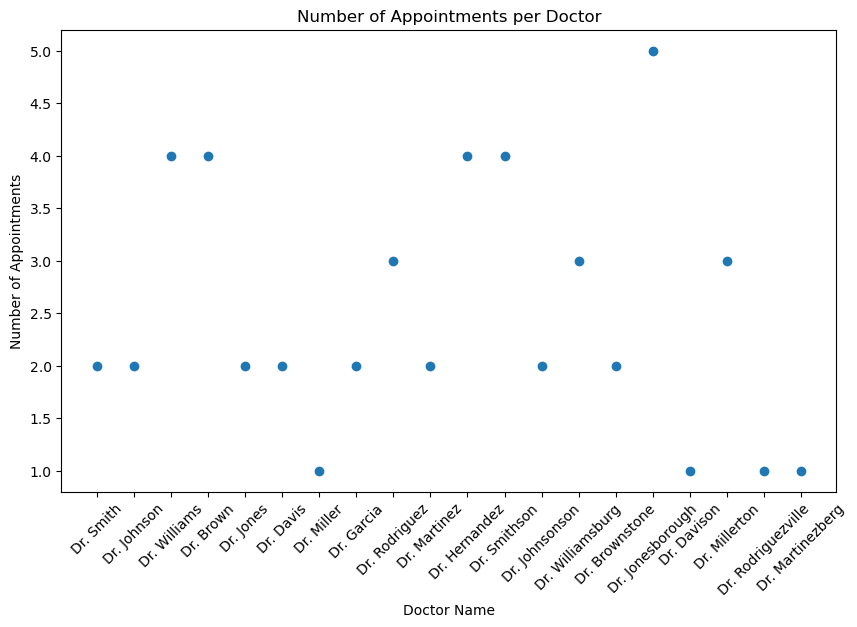

In [45]:
#Query2


query = """
SELECT 
    Doctors.name, 
    COUNT(Appointments.Appointment_id) AS NumberOfAppointments
FROM 
    Appointments
JOIN 
    Doctors ON Appointments.doctorID = Doctors.Doctor_id
GROUP BY 
    Doctors.Doctor_id;
"""

results_df2 = pd.read_sql(query, connection)

print(results_df2.head())

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(results_df2['name'], results_df2['NumberOfAppointments'])
plt.xlabel('Doctor Name')
plt.ylabel('Number of Appointments')
plt.title('Number of Appointments per Doctor')
plt.xticks(rotation=45)
plt.show()


                name        date
0           John Doe  2023-03-01
1         Jane Smith  2023-03-05
2    Michael Johnson  2023-03-10
3        Emily Davis  2023-03-15
4  Christopher Brown  2023-03-20


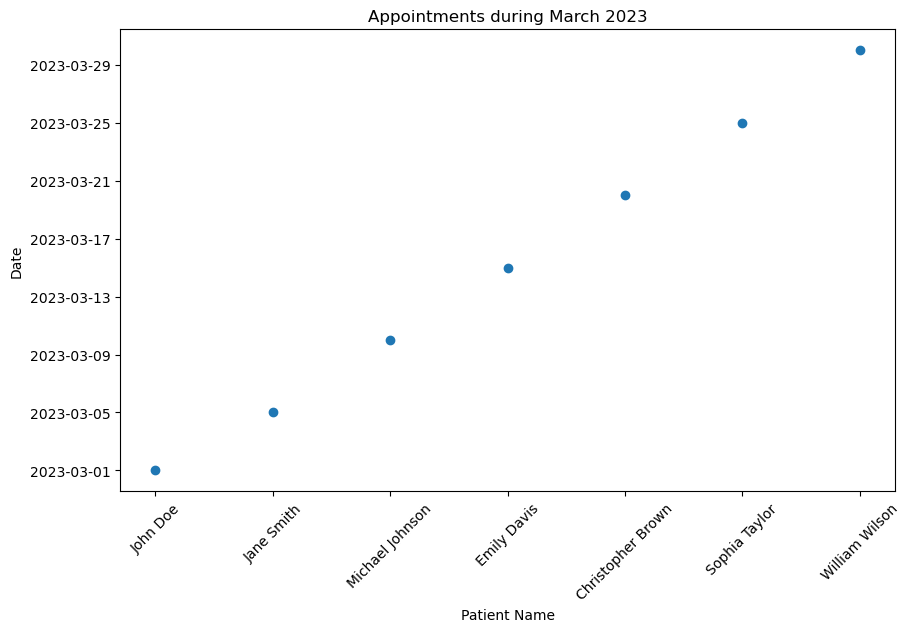

In [46]:
#Query3


query = """
select pd.name, a.date from appointments a
join regular_patients rp on a.patientID = rp.patientID
join patient_details pd on rp.patientID = pd.patient_id
where a.date >= '2023-03-01' and a.date<= '2023-03-31'
"""

results_df3 = pd.read_sql(query, connection)

print(results_df3.head())


# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(results_df3['name'], results_df3['date'])
plt.xlabel('Patient Name')
plt.ylabel('Date')
plt.title('Appointments during March 2023')
plt.xticks(rotation=45)
plt.show()



  payment_method  No_of_orders
0    Credit Card            17
1           Cash            17
2     Debit Card            16


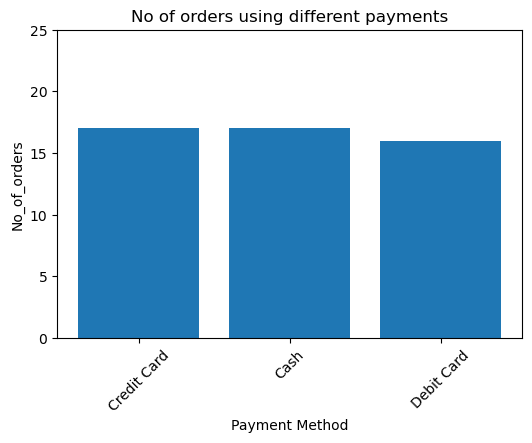

In [47]:
#Query4


query = "select payment_method, count(Order_id) as No_of_orders from pharmacy_orders group by payment_method"

results_df4 = pd.read_sql(query, connection)

print(results_df4.head())


# Scatter plot
plt.figure(figsize=(6, 4))
plt.bar(results_df4['payment_method'], results_df4['No_of_orders'])
plt.xlabel('Payment Method')
plt.ylabel('No_of_orders')
plt.title('No of orders using different payments')
plt.ylim(0,25)
plt.xticks(rotation=45)
plt.show()



  payment_method  Average_Amount_Payed
0    Credit Card            119.411765
1           Cash            147.941176
2     Debit Card             96.250000


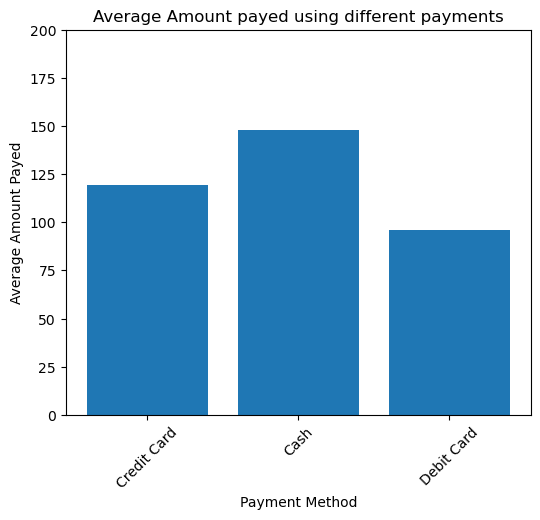

In [48]:
#Query 5

query = "SELECT  payment_method, AVG(amount_due) AS Average_Amount_Payed FROM Payment_Details group by payment_method"

results_df5 = pd.read_sql(query, connection)
print(results_df5.head())

# Scatter plot
plt.figure(figsize=(6, 5))
plt.bar(results_df5['payment_method'], results_df5['Average_Amount_Payed'])
plt.xlabel('Payment Method')
plt.ylabel('Average Amount Payed')
plt.title('Average Amount payed using different payments')
plt.ylim(0,200)
plt.xticks(rotation=45)
plt.show()
